In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import streamlit as st

In [7]:
df = pd.read_csv("Datasets/DataFrame.csv")
df2 = df

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22805 entries, 0 to 22804
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        22805 non-null  object 
 1   Date        22805 non-null  int64  
 2   Time        22805 non-null  object 
 3   open        22805 non-null  float64
 4   high        22805 non-null  float64
 5   low         22805 non-null  float64
 6   close       22805 non-null  float64
 7   Unnamed: 7  0 non-null      float64
dtypes: float64(5), int64(1), object(2)
memory usage: 1.4+ MB


In [9]:
df2.head()

,Type,Date,Time,open,high,low,close,Unnamed: 7
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN


In [10]:
df2["Unnamed: 7"].isnull().sum()

22805

## Datatypes

In [11]:
df2.dtypes

Type           object
Date            int64
Time           object
open          float64
high          float64
low           float64
close         float64
Unnamed: 7    float64
dtype: object

In [12]:
df2["DateAndTime"] = df2["Date"].astype(str) + df2["Time"]

2021-05-28 07:39:29.721 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [13]:
df2.head()

,Type,Date,Time,open,high,low,close,Unnamed: 7,DateAndTime
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN,2021010109:16
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN,2021010109:17
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN,2021010109:18
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN,2021010109:19
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN,2021010109:20


In [14]:
df2["DateAndTime"] = pd.to_datetime(df2["DateAndTime"],format="%Y%m%d%H:%M")

In [15]:
df2.head()

,Type,Date,Time,open,high,low,close,Unnamed: 7,DateAndTime
0,NIFTY,20210101,09:16,13997.90,14020.85,13991.35,14013.15,NaN,2021-01-01 09:16:00
1,NIFTY,20210101,09:17,14014.85,14018.55,14008.15,14009.05,NaN,2021-01-01 09:17:00
2,NIFTY,20210101,09:18,14008.05,14013.10,14005.05,14012.70,NaN,2021-01-01 09:18:00
3,NIFTY,20210101,09:19,14013.65,14019.10,14013.65,14016.20,NaN,2021-01-01 09:19:00
4,NIFTY,20210101,09:20,14015.45,14017.80,14011.95,14015.45,NaN,2021-01-01 09:20:00


In [16]:
df2 = df2.drop(["Unnamed: 7","Date","Time"],axis=1)

In [17]:
print(df2.dtypes)

Type                   object
open                  float64
high                  float64
low                   float64
close                 float64
DateAndTime    datetime64[ns]
dtype: object


In [18]:
df2.head()

,Type,open,high,low,close,DateAndTime
0,NIFTY,13997.90,14020.85,13991.35,14013.15,2021-01-01 09:16:00
1,NIFTY,14014.85,14018.55,14008.15,14009.05,2021-01-01 09:17:00
2,NIFTY,14008.05,14013.10,14005.05,14012.70,2021-01-01 09:18:00
3,NIFTY,14013.65,14019.10,14013.65,14016.20,2021-01-01 09:19:00
4,NIFTY,14015.45,14017.80,14011.95,14015.45,2021-01-01 09:20:00


## NULL Values

In [19]:
df2.isnull().sum()

Type           0
open           0
high           0
low            0
close          0
DateAndTime    0
dtype: int64

## Exploring Dataset

In [20]:
df2.dtypes

Type                   object
open                  float64
high                  float64
low                   float64
close                 float64
DateAndTime    datetime64[ns]
dtype: object

In [21]:
df2.describe()

,open,high,low,close
count,22805.000000,22805.000000,22805.000000,22805.000000
mean,14703.322396,14707.486481,14699.102201,14703.260816
std,391.377498,391.265231,391.551643,391.366248
min,13604.750000,13614.400000,13596.750000,13602.800000
25%,14462.250000,14465.950000,14458.050000,14461.950000
50%,14739.500000,14743.000000,14735.850000,14739.450000
75%,15037.000000,15041.250000,15032.500000,15036.850000
max,15429.500000,15431.750000,15427.900000,15430.200000


<AxesSubplot:>

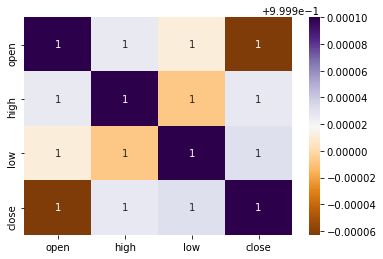

In [22]:
#Checking Relation Between features
corr_matrix=df2.corr()
# plot it
sns.heatmap(corr_matrix, cmap='PuOr',annot=True)

In [23]:
#Getting Number of different types of stock
df2.Type.unique().size

1

In [24]:
#Number of month we have
df2.DateAndTime.dt.month.unique()

array([1, 2, 3], dtype=int64)

In [25]:
#Opening and Closing time of Stock
print("Opening Time:"+ str(df2.DateAndTime.dt.hour.min()))
print("Closing Time:"+ str(df2.DateAndTime.dt.hour.max()))

Opening Time:9
Closing Time:17


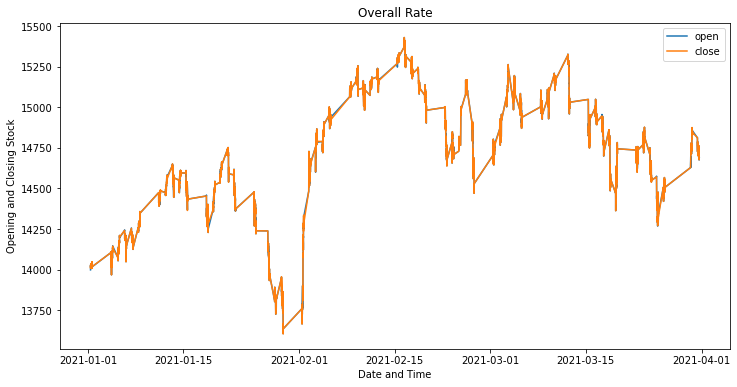

In [26]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df2["DateAndTime"],y=df2["open"])
sns.lineplot(x=df2["DateAndTime"],y=df2["close"])
plt.xlabel("Date and Time")
plt.ylabel("Opening and Closing Stock")
plt.legend(["open","close"])
plt.title("Overall Rate")
plt.show()

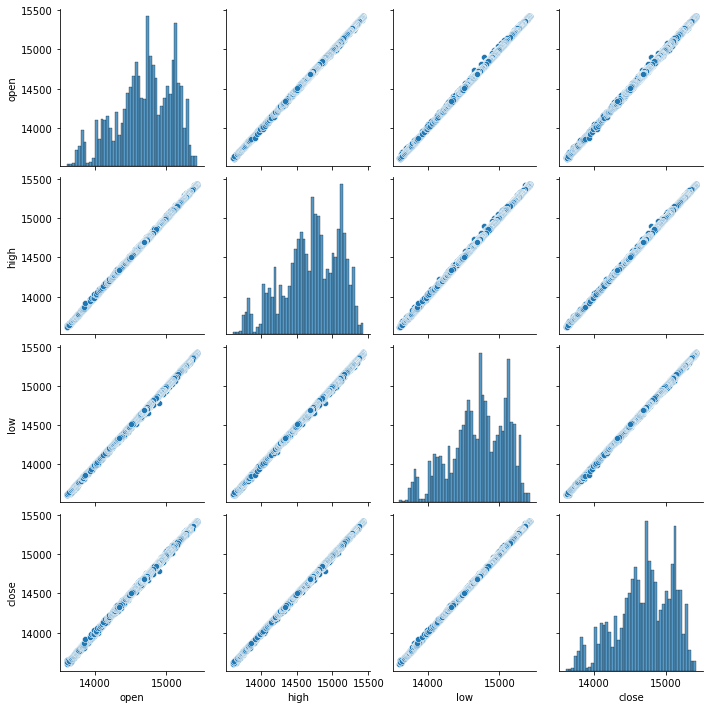

In [27]:
sns.pairplot(df2)

In [28]:
#we can figure out linear relation between variables


## MODEL  (GRU)

In [69]:
training_set=df2['open']
training_set=pd.DataFrame(training_set)
training_set

,open
0,13997.90
1,14014.85
2,14008.05
3,14013.65
4,14015.45
...,...
22800,14687.35
22801,14690.90
22802,14690.30
22803,14689.85


In [70]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = scaler.fit_transform(training_set)

In [71]:
training_size = df2.shape[0]*0.80
testing_size = df.shape[0] - training_size
print("Training Size:"+str(training_size))
print("Testing Size:"+str(testing_size))

Training Size:18244.0
Testing Size:4561.0


In [72]:
##Creating Training Set with step of 60-minutes

In [73]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 18244):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [74]:
print(X_train.shape)
print(y_train.shape)

(18184, 60, 1)
(18184,)


In [75]:
import numpy as np
X_test = []
y_test = []
date=[]
#18305
for i in range(18244, 22805):
    X_test.append(training_set_scaled[i-60:i, 0])
    y_test.append(training_set_scaled[i, 0])
    date.append(df2.DateAndTime[i])
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [76]:
print(X_test.shape)
print(y_test.shape)

(4561, 60, 1)
(4561,)


In [2]:
#Building the REAL Model
from keras.models import Sequential
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM, GRU

In [38]:
#GRU model with 128 units and 4 layers
model = Sequential()
model.add(GRU(units = 50,activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(units = 50,activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))
#model.add(GRU(units = 128,activation = 'relu', return_sequences = True,dropout=0.2))
model.add(GRU(units = 50,activation = 'relu'))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 50)            7950      
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 50)                15300     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [40]:
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mse',)

# Fitting the RNN to the Training set
history = model.fit(X_train, y_train, epochs=3)

Epoch 1/3
569/569 [==============================] - 32s 51ms/step - loss: 0.0526
Epoch 2/3
569/569 [==============================] - 30s 52ms/step - loss: 0.0056
Epoch 3/3
569/569 [==============================] - 31s 55ms/step - loss: 0.0039


In [42]:
# save the model to disk
model.save("model.h5")

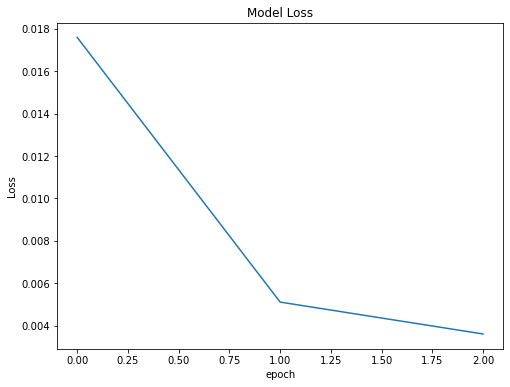

In [43]:
plt.figure(figsize=(8,6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [3]:
#Predicting the test data
model = keras.models.load_model('model.h5')

In [78]:
#Reversing the scaler transformation to get actual value
prediction = model.predict(X_test)
prediction = scaler.inverse_transform(prediction)
prediction  

array([[15004.973],
       [15008.373],
       [15010.881],
       ...,
       [14685.455],
       [14685.444],
       [14685.503]], dtype=float32)

In [80]:
y_test = y_test.reshape(1,4561)
y_test = scaler.inverse_transform(y_test).flatten()
y_test

array([15043.  , 15038.1 , 15043.3 , ..., 14690.3 , 14689.85, 14690.7 ])

In [81]:
prediction = prediction.reshape(1,4561).flatten()

In [82]:
b = pd.DataFrame(y_test,columns=["Original"])
a = pd.DataFrame(prediction,columns=['Predicted'])
c = pd.concat([a,b],axis=1, join="inner")
date = np.array(date)
c['Date']=date

In [83]:
c

,Predicted,Original,Date
0,15004.972656,15043.00,2021-03-12 15:07:00
1,15008.373047,15038.10,2021-03-12 15:08:00
2,15010.880859,15043.30,2021-03-12 15:09:00
3,15012.848633,15037.35,2021-03-12 15:10:00
4,15014.313477,15039.00,2021-03-12 15:11:00
...,...,...,...
4556,14686.069336,14687.35,2021-03-31 15:27:00
4557,14685.640625,14690.90,2021-03-31 15:28:00
4558,14685.455078,14690.30,2021-03-31 15:29:00
4559,14685.444336,14689.85,2021-03-31 15:30:00


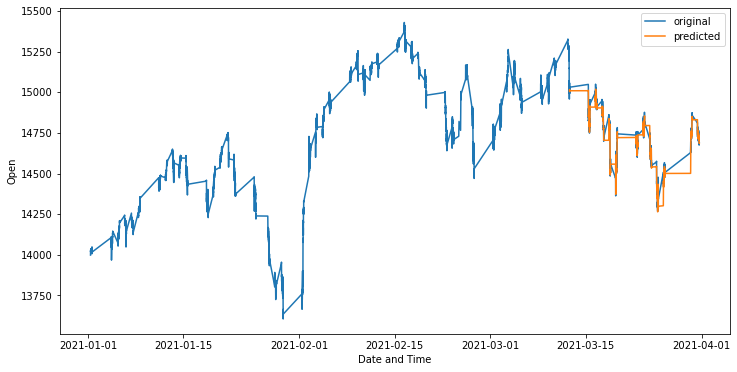

In [84]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df2["DateAndTime"],y=df2["open"])
sns.lineplot(x=c.Date,y=c['Predicted'])
plt.xlabel("Date and Time")
plt.ylabel("Open")
plt.legend(["original","predicted"])
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Predicted'>

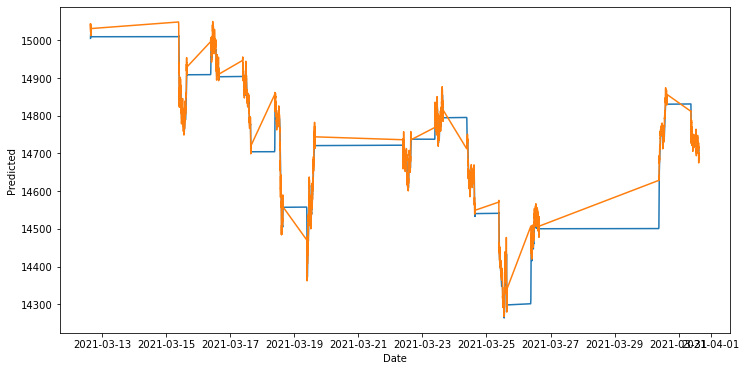

In [85]:
plt.figure(figsize=(12,6))
sns.lineplot(x=c.Date,y=c['Predicted'])
sns.lineplot(x=c.Date,y=c['Original'])

In [86]:
from sklearn.metrics import mean_squared_error
import math

rmse = math.sqrt(mean_squared_error(c.Original, c.Predicted))
print("the root mean squared error is : {}.".format(rmse))

the root mean squared error is : 23.22475439386126.


In [87]:
from sklearn.metrics import r2_score
r2_score(c.Original, c.Predicted)

0.9807731516871021

In [88]:
print("Accuracy :", (100 - (abs(c.Original-c.Predicted)/c.Original).mean()))

Accuracy : 99.99883577989469


## Future Prediction

In [25]:
import pickle
with open('ftest.pkl', 'rb') as f:
    f_test = pickle.load(f)
f_test = np.array(f_test)
f_test = np.reshape(f_test, (f_test.shape[0], f_test.shape[1],1))

0.5820931

In [27]:
f_predict = []
n_days = 1
minutes = 0
hours = 8 #[9--17]


In [28]:
for i in range (n_days):
    while (hours > 0):
        while (minutes < 60):
            res = model.predict(f_test)
            f_predict.append(res[0][0])
            f_test = np.delete(f_test,[0],None)
            f_test = np.append(f_test,res[0][0],None)
            f_test = f_test.reshape(1,60,1)
            minutes=minutes+1
        hours=hours-1
        minutes = 0
    hours=8
    minutes=0

In [30]:
len(f_predict)

480

In [97]:
st.write("Welcome to Prediction Demo")

2021-05-28 08:32:03.341 WARNING root: 
  command:

    streamlit run C:\Users\bluecoder\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


## Different Approach

In [65]:
df1 = df2.copy()

In [67]:
df1 = df2.reset_index()['open']

In [69]:
df1.shape

(22805,)

In [70]:
df1

0        13997.90
1        14014.85
2        14008.05
3        14013.65
4        14015.45
           ...   
22800    14687.35
22801    14690.90
22802    14690.30
22803    14689.85
22804    14690.70
Name: open, Length: 22805, dtype: float64

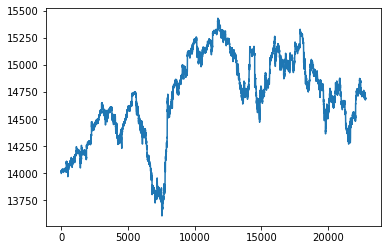

In [71]:
plt.plot(df1)

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [74]:
df1.shape

(22805, 1)

In [75]:
#Splitting test train
training_size = int(len(df1)*0.80)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [76]:
training_size,test_size

(18244, 4561)

In [82]:
#convert the array of values to dataset matrix
def create_dataset(dataset,time_steps):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_steps-1):
        a=dataset[i:(i+time_steps),0]
        dataX.append(a)
        dataY.append(dataset[i+time_steps,0])
    return np.array(dataX),np.array(dataY)

In [84]:
time_step = 60
X_train,y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [89]:
#reshape input to be (samples,time_step,features)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [91]:
model1 = Sequential()
model1.add(GRU(50,return_sequences = True,input_shape=(60,1)))
model1.add(GRU(50,return_sequences = True))
model1.add(GRU(50))
model1.add(Dense(1))
model1.compile(loss='mean_squared_error',optimizer='adam')

In [95]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 60, 50)            7950      
_________________________________________________________________
gru_3 (GRU)                  (None, 60, 50)            15300     
_________________________________________________________________
gru_4 (GRU)                  (None, 50)                15300     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 38,601
Trainable params: 38,601
Non-trainable params: 0
_________________________________________________________________


In [96]:
model1.fit(X_train,y_train,validation_data =(X_test,y_test),epochs=5,batch_size=64,verbose=1)

Epoch 1/5
285/285 [==============================] - 20s 55ms/step - loss: 0.0237 - val_loss: 7.3479e-05
Epoch 2/5
285/285 [==============================] - 19s 67ms/step - loss: 6.0160e-05 - val_loss: 5.2063e-05
Epoch 3/5
285/285 [==============================] - 18s 63ms/step - loss: 5.2965e-05 - val_loss: 4.5802e-05
Epoch 4/5
285/285 [==============================] - 18s 62ms/step - loss: 3.9648e-05 - val_loss: 4.1026e-05
Epoch 5/5
285/285 [==============================] - 18s 62ms/step - loss: 3.5426e-05 - val_loss: 3.5418e-05


In [108]:
##Lets predict and check peformance
train_predict = model1.predict(X_train)
test_predict = model1.predict(X_test)

In [98]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [109]:
math.sqrt(mean_squared_error(y_train,train_predict))

0.00591472704117853

In [110]:
math.sqrt(mean_squared_error(y_test,test_predict))

0.005951311098668403

In [107]:
train_predict

array([[14024.479],
       [14024.889],
       [14024.85 ],
       ...,
       [15015.826],
       [15035.301],
       [15041.43 ]], dtype=float32)

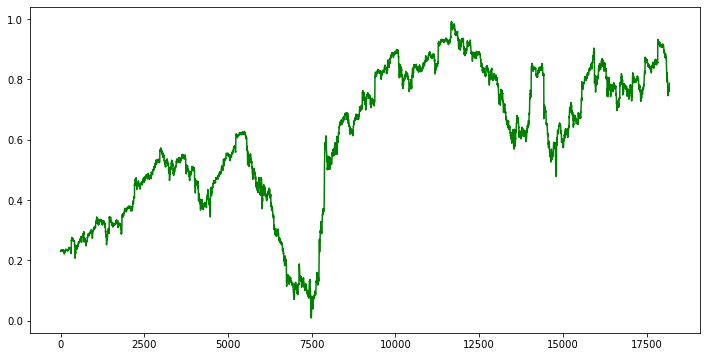

In [119]:
plt.figure(figsize=(12,6))
plt.plot(train_predict,color='g')
#plt.plot(y_train,color='r')

In [111]:
print("Accuracy :", (100 - (abs(y_test-test_predict)/y_test).mean()))

Accuracy : 99.82016012075822
